In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('hearing_test.csv')

df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

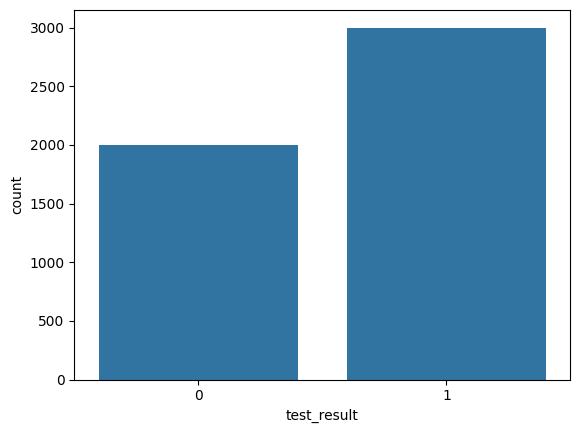

In [7]:
sns.countplot(x='test_result',data=df)

<Axes: xlabel='test_result', ylabel='age'>

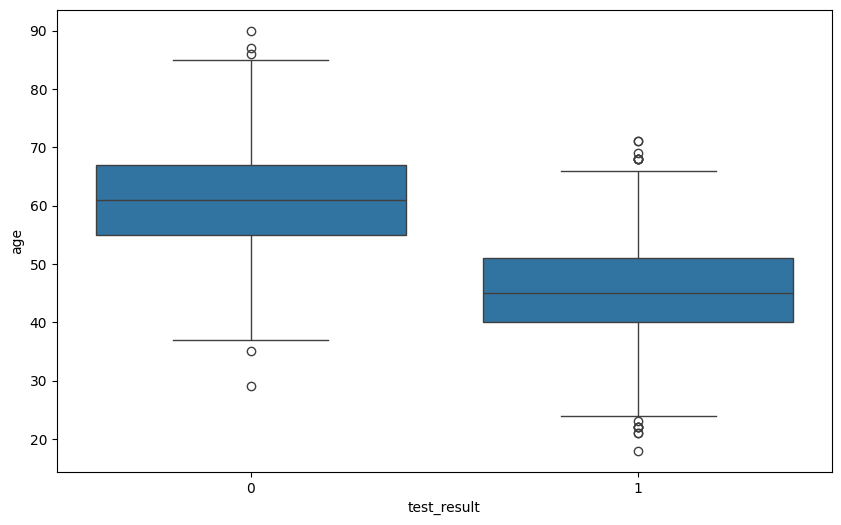

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

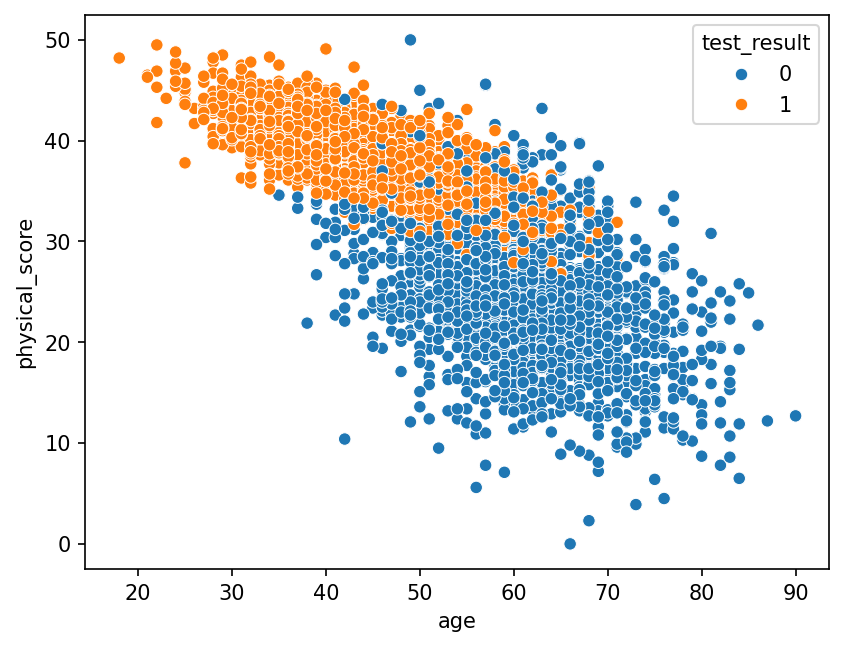

In [13]:
plt.figure(dpi=150)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

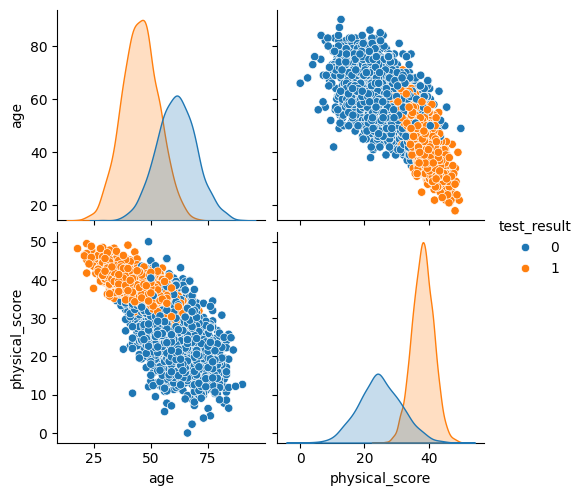

In [14]:
sns.pairplot(df,hue='test_result')

<Axes: >

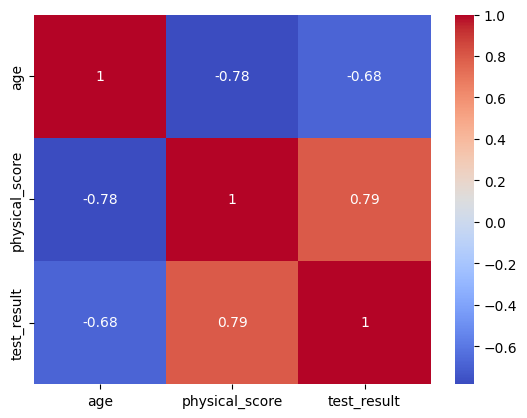

In [15]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

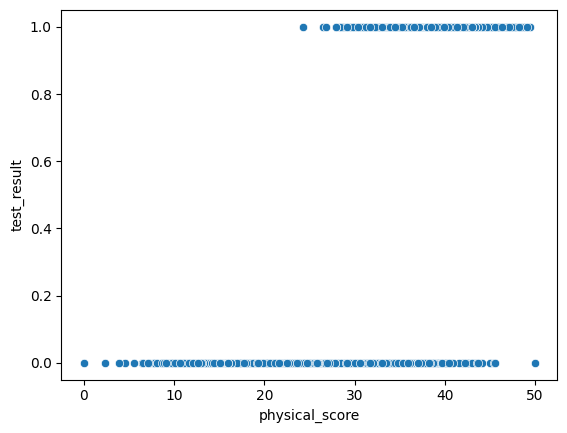

In [17]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

In [18]:
from mpl_toolkits.mplot3d import Axes3D

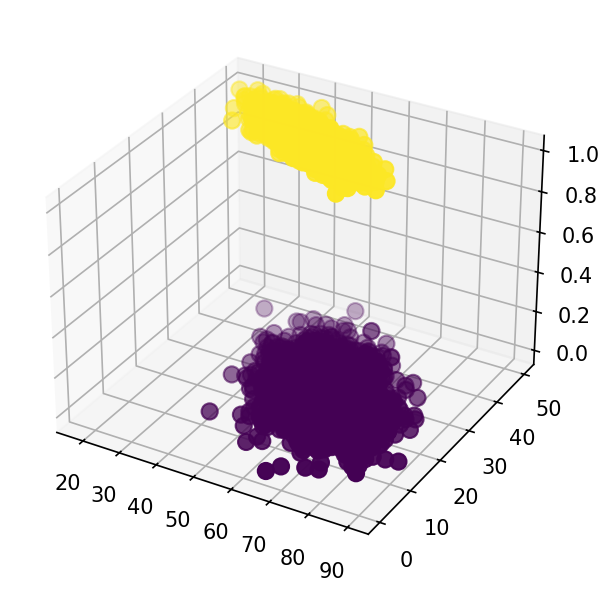

In [20]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'], s=60)

In [21]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [26]:
logmodel.coef_

array([[-0.91707661,  3.45211325]])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
y_pred = logmodel.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.9206666666666666

In [33]:
confusion_matrix(y_test,y_pred)

array([[515,  82],
       [ 37, 866]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [38]:
from sklearn.metrics import roc_curve, auc,precision_score,recall_score

In [39]:
precision_score(y_test,y_pred)

0.9135021097046413

In [40]:
recall_score(y_test,y_pred)

0.9590254706533776

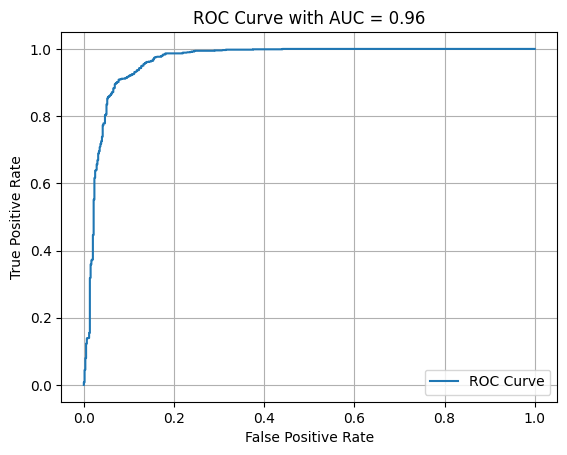

In [45]:
from sklearn.metrics import roc_auc_score

y_proba_test = logmodel.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()